<a href="https://colab.research.google.com/github/cjstntjd/machine/blob/master/Advanced_housing_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive',force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neopchi","key":"e9314cf98c2827f1e4630b82b2cd2508"}'}

In [0]:
ls -1ha kaggle.json

kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
#커미션 모드 600 소유자 only 읽기 쓰기 
 
!kaggle competitions list

ref                                            deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started   Knowledge       2283           False  
titanic                                        2030-01-01 00:00:00  Getting Started   Knowledge      15932           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started   Knowledge       5281            True  
connectx                                       2030-01-01 00:00:00  Getting Started   Knowledge        266           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research          Knowledge         62           False  
competitive-data-science-predict-future-sales  2020-12-31 23:59:00  Playground            Kudos       5463           False  


In [0]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 64.3MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 31.9MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 27.9MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 61.3MB/s]


In [0]:
!ls

data_description.txt  sample_data	     test.csv
kaggle.json	      sample_submission.csv  train.csv


In [0]:
'''
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
생긴건 숫자지만 결국엔 10 단위로 나뉘어진 카테고리형 데이터 -> object로 바꿔주기

       Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
      Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
 두개는 같은 값을 갖는 변수 나중에 묶어서 파생변수 만들기

 Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

얘네 둘도 같은 카테고리에 속함 묶어서 계산
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

condition 값임 묶어서 계산


Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)

묶어서 계산 

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

이렇게 범주형 카테고리가 몇개 있음 묶어서 보고 퀄리티를 포함하는 측면이면 아가 데이터와 묶어서 생각하기 
BsmtQual: Evaluates the height of the basement
BsmtCond: Evaluates the general condition of the basement
BsmtExposure: Refers to walkout or garden level walls
전부 퀄리티 적인 측면을 요소로 하는 데이터 들임 하나로 합치면 데이터 양도 줄이고 하나의 파생변수로 기능할수있음

BsmtFinType1: Rating of basement finished area
BsmtFinType2: Rating of basement finished area (if multiple types)

포함

1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade
숫자형 데이터 임 

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
하나로 묶어서 생각할것 퀄리티 적인 측면의 데이터는 합산해도 상관 없음 

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

year의 대표값을 선정하는 알고리즘을 짜면 아까보다 더 좋은 성능을 기대할수 있음 



       '''

"\nMSSubClass: Identifies the type of dwelling involved in the sale.\t\n\n        20\t1-STORY 1946 & NEWER ALL STYLES\n        30\t1-STORY 1945 & OLDER\n        40\t1-STORY W/FINISHED ATTIC ALL AGES\n        45\t1-1/2 STORY - UNFINISHED ALL AGES\n        50\t1-1/2 STORY FINISHED ALL AGES\n        60\t2-STORY 1946 & NEWER\n        70\t2-STORY 1945 & OLDER\n        75\t2-1/2 STORY ALL AGES\n        80\tSPLIT OR MULTI-LEVEL\n        85\tSPLIT FOYER\n        90\tDUPLEX - ALL STYLES AND AGES\n       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n       150\t1-1/2 STORY PUD - ALL AGES\n       160\t2-STORY PUD - 1946 & NEWER\n       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n       \n생긴건 숫자지만 결국엔 10 단위로 나뉘어진 카테고리형 데이터 -> object로 바꿔주기\n\n       Street: Type of road access to property\n\n       Grvl\tGravel\t\n       Pave\tPaved\n       \t\n      Alley: Type of alley access to property\n\n       Grvl\tGravel\n       Pave\tPa

In [0]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# concat
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


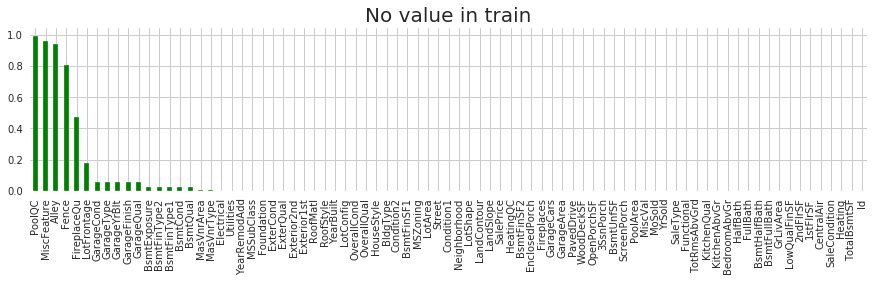

In [0]:
plt.style.use('seaborn')
sns.set_style('whitegrid')

plt.subplots(0,0,figsize=(15,3))
train.isnull().mean().sort_values(ascending = False).plot.bar(color = 'green')
plt.title('No value in train',fontsize = 20)
plt.show()

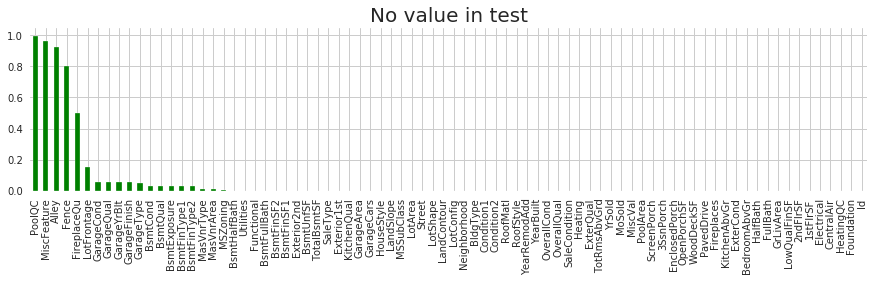

In [0]:
plt.style.use('seaborn')
sns.set_style('whitegrid')

plt.subplots(0,0,figsize=(15,3))
test.isnull().mean().sort_values(ascending = False).plot.bar(color = 'green')
plt.title('No value in test',fontsize = 20)
plt.show()

In [0]:
#head에 보니까 숫자형이랑 카테고리 형식이 있었는데 이것들을 어떻게 할건지 생각해보자 
#MSsubclass 설명서 읽어보니까 숫자인데 실제는 설명임 의미가 없는 숫자였음 

train['MSSubClass'] = train['MSSubClass'].astype(object)
test['MSSubClass'] = test['MSSubClass'].astype(object)
#바꾸자

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

In [0]:
catego_count = [col for col in train.columns if train[col].dtypes == 'object']

print(catego_count)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [0]:
td = train.drop(['SalePrice'],axis =1)
td = td.append(test)
td = td.drop(['Id'],axis=1)
td.shape

(2919, 79)

In [0]:
for col in catego_count:
  td[col] = td[col].fillna('miss')
  #빈칸도 개수를 세어서 영향을 미칠것 그러니까 miss라고 두자 

In [0]:
#라벨인코딩
from sklearn.preprocessing import LabelEncoder

for col in catego_count:
  le = LabelEncoder()
  td[col] = le.fit_transform(td[col])

td.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4
1,0,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,1,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4
2,5,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4
3,6,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0
4,5,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4


In [0]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null int64
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null int64
Alley            2919 non-null int64
LotShape         2919 non-null int64
LandContour      2919 non-null int64
Utilities        2919 non-null int64
LotConfig        2919 non-null int64
LandSlope        2919 non-null int64
Neighborhood     2919 non-null int64
Condition1       2919 non-null int64
Condition2       2919 non-null int64
BldgType         2919 non-null int64
HouseStyle       2919 non-null int64
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null int64
RoofMatl         2919 non-null int64
Exterior1st      2919 non-null int64
Exterior2nd      2919 non-null int64
Mas

In [0]:
continuous_variables = [col for col in td.columns if td[col].dtype != "object"]
print("number of continuous variables: ")
print(len(continuous_variables))

number of continuous variables: 
79


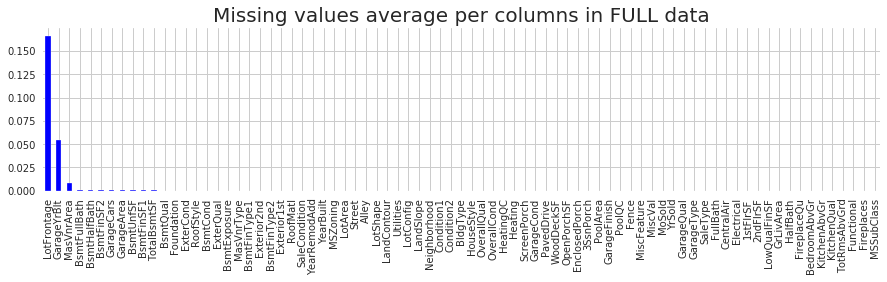

In [0]:
plt.subplots(1,0,figsize = (15,3))
td.loc[:,continuous_variables].isnull().mean().sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values average per columns in FULL data', fontsize = 20)
plt.show()

<Figure size 1080x216 with 0 Axes>

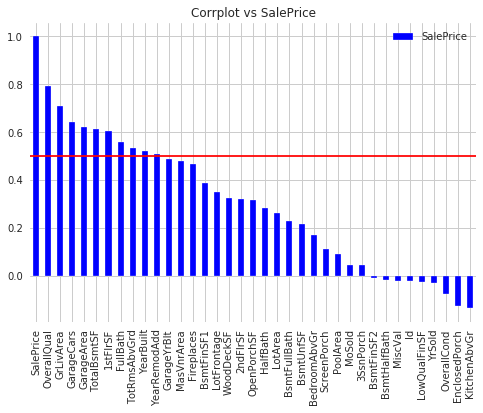

In [0]:
num = train.select_dtypes(exclude = 'object')
numcorr = num.corr()

plt.subplots(1,0,figsize = (15,3))
numcorr['SalePrice'].sort_values(ascending = False).to_frame().plot.bar(color = 'blue')
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.title('Corrplot vs SalePrice')
plt.show()

In [0]:
Num=numcorr['SalePrice'].sort_values(ascending=False).to_frame()
cm = sns.light_palette("red", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Text(0.5, 1.0, 'MasVnrArea - SalePrice')

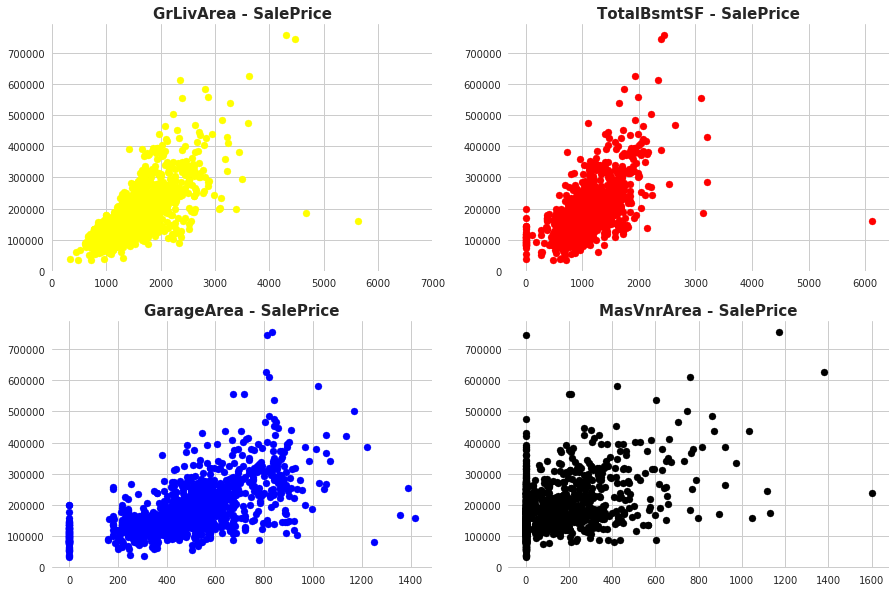

In [0]:
#이상치를 제거할것이냐 말것이냐 문제
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((2,2),(0,0))
ax1.set_xlim([0,7000])
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'], color = ('yellow'))
plt.title('GrLivArea - SalePrice', fontsize = 15, weight = 'bold')

ax1 = plt.subplot2grid((2,2),(0,1))
plt.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'], color = ('red'))
plt.title('TotalBsmtSF - SalePrice', fontsize = 15, weight = 'bold')

ax1 = plt.subplot2grid((2,2),(1,0))
plt.scatter(x = train['GarageArea'], y = train['SalePrice'], color = ('blue'))
plt.title('GarageArea - SalePrice', fontsize = 15, weight = 'bold')

ax1 = plt.subplot2grid((2,2),(1,1))
plt.scatter(x = train['MasVnrArea'], y = train['SalePrice'], color = ('black'))
plt.title('MasVnrArea - SalePrice', fontsize = 15, weight = 'bold')

#이거 구석에 몰려 있는 값은 제거 하면 안될거 같은데 바꺝에 있는 애들도 양이 많아서

In [0]:
td['GarageYrBlt'].value_counts()

2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
         ... 
1933.0      1
1943.0      1
1906.0      1
1919.0      1
1896.0      1
Name: GarageYrBlt, Length: 103, dtype: int64

In [0]:
td['GarageYrBlt'] = td['GarageYrBlt'].fillna(1978)
# 일단 여기까지

In [0]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null int64
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null int64
Alley            2919 non-null int64
LotShape         2919 non-null int64
LandContour      2919 non-null int64
Utilities        2919 non-null int64
LotConfig        2919 non-null int64
LandSlope        2919 non-null int64
Neighborhood     2919 non-null int64
Condition1       2919 non-null int64
Condition2       2919 non-null int64
BldgType         2919 non-null int64
HouseStyle       2919 non-null int64
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null int64
RoofMatl         2919 non-null int64
Exterior1st      2919 non-null int64
Exterior2nd      2919 non-null int64
Mas

In [0]:
td['MasVnrArea'].value_counts()

0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 444, dtype: int64

In [0]:
td['MasVnrArea'].describe()

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [0]:
td['MasVnrArea']=td['MasVnrArea'].fillna(102.2)

In [0]:
for col in continuous_variables:
    td[col] = td[col].fillna(0)

#아까 빈칸 남은거 다 채워야 됨

In [0]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null int64
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null int64
Alley            2919 non-null int64
LotShape         2919 non-null int64
LandContour      2919 non-null int64
Utilities        2919 non-null int64
LotConfig        2919 non-null int64
LandSlope        2919 non-null int64
Neighborhood     2919 non-null int64
Condition1       2919 non-null int64
Condition2       2919 non-null int64
BldgType         2919 non-null int64
HouseStyle       2919 non-null int64
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null int64
RoofMatl         2919 non-null int64
Exterior1st      2919 non-null int64
Exterior2nd      2919 non-null int64
Mas

In [0]:
td = td.drop(['MoSold',
              '3SsnPorch','BsmtFinSF2','BsmtHalfBath',
             'MiscVal',
              'LowQualFinSF','YrSold'], axis = 1)

In [0]:
td = td.drop(['Neighborhood','Condition2',
                     'Exterior1st','Exterior2nd',
                      'PoolQC','Alley'
                     ], axis=1)

In [0]:
td['year_qual'] = td['YearBuilt']*td['OverallQual']
td['year_r_qual'] = td['YearRemodAdd']*td['OverallQual']
td['qual_bsmt'] = td['OverallQual']*td['TotalBsmtSF']
td['livarea_qual'] = td['OverallQual']*td['GrLivArea']
td['qual_bath'] = td['OverallQual']*td['FullBath']
td['TotalArea'] = td['TotalBsmtSF'] + td['1stFlrSF'] + td['2ndFlrSF'] + td['GrLivArea'] + td['GarageArea']
td['Bathrooms'] = td['FullBath'] + td['HalfBath']
td['YearAverage'] = (td['YearRemodAdd'] + td['YearBuilt'])/2


In [0]:
log_cols = ['livarea_qual','qual_bsmt',
            'LotArea',
           'MasVnrArea', 'TotalBsmtSF',
           'GarageArea','GrLivArea',
            ]
for col in log_cols:
    td[col] = np.log1p(td[col])

In [0]:
num = train.select_dtypes(exclude = 'object')
numcorr = num.corr()

Num=numcorr['SalePrice'].sort_values(ascending=False).to_frame()
cm = sns.light_palette("red", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [0]:
test_s = pd.read_csv('sample_submission.csv')
test_s.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [0]:
train_x = td.iloc[0:len(train),]
test_x = td.iloc[len(train): len(td),]

train_y = np.log1p(train['SalePrice'])
test_y = np.log1p(test_s['SalePrice'])

In [0]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer

scorer = make_scorer(mean_squared_error,greater_is_better = False)

def rmse_cv_train(model):
  rmse=np.sqrt(-cross_val_score(model,train_x,train_y,scoring=scorer,cv=10))
  return(rmse)

def rmse_cv_test(model):
  rmse=np.sqrt(-cross_val_score(model,test_x,test_y,scoring=scorer,cv=10))
  return(rmse)

In [0]:
#선형회귀
lr = LinearRegression()
lr.fit(train_x, train_y)

print('rmse train', rmse_cv_train(lr).mean())

rmse train 0.13788206348287052


In [0]:
lr2 = LinearRegression()
lr2.fit(test_x, test_y)

print('rmse test', rmse_cv_test(lr2).mean())

rmse test 0.029147293673285002


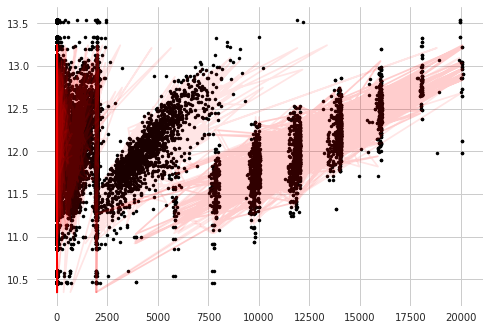

In [0]:
plt.plot(train_x,train_y,'k.')
plt.grid(True)
plt.plot(train_x,lr.predict(train_x),color='r',alpha=0.1)

In [0]:
#확률적 경사하강법 스텝에서 하나의 샘플을 무작위로 추출하고 그 샘플에 대한 경사를 구한다. 

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=100,penalty = None,eta0=0.1)
sgd_reg.fit(train_x, train_y)

sgd_reg2 = SGDRegressor(max_iter=100,penalty = None,eta0=0.1)
sgd_reg2.fit(test_x, test_y)


print('rmse train: 확률 경사:', rmse_cv_train(sgd_reg).mean())
print('train 수치 : ',sgd_reg.predict(train_x))
print('rmse test: 확률 경사:', rmse_cv_test(sgd_reg).mean())
print('test 수치 : ',sgd_reg2.predict(test_x))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linea

rmse train: 확률 경사: 7.503062494765487e+17
train 수치 :  [-1.02628733e+18 -7.85612537e+17 -1.06079241e+18 ... -1.09086670e+18
 -5.73209282e+17 -5.57398652e+17]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


rmse test: 확률 경사: 1.0734126179919834e+18
test 수치 :  [4.97235021e+17 6.05580801e+17 6.27945710e+17 ... 5.75577287e+17
 4.33088571e+17 8.21689914e+17]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [0]:
#가지고 있는 데이터가 단순한 직선이 아닌 복잡한 형태라면 다항회귀를 사용한다. 

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(train_x)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, train_y)

print('rmse train', rmse_cv_train(lin_reg).mean())

rmse train 0.13788206348287052


ValueError: ignored

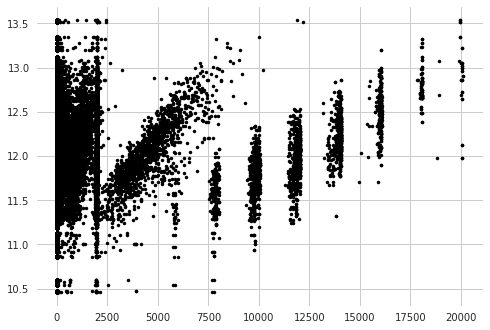

In [0]:
plt.plot(train_x,train_y,'k.')
plt.grid(True)
plt.plot(train_x,lin_reg.predict(train_x),color='r')

In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10,random_state=42)
forest_reg.fit(train_x,train_y)

housing_predictions = forest_reg.predict(train_x)
forest_mse = mean_squared_error(train_y, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


In [0]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = np.exp(forest_reg.predict(test_x))-1
sample_submission.to_csv('submission_RF.csv',index=False)


In [0]:
files.download('submission_RF.csv')

In [0]:
from sklearn.linear_model import Ridge

# Ridge model을 사용한 훈련 

ridge_reg = Ridge(alpha=0.05,normalize=True)
ridge_reg.fit(train_x,train_y)

pred = ridge_reg.predict(train_x)

mse = np.mean((pred - train_y)**2)

print(mse)

0.01651220885583274


In [0]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = np.exp(ridge_reg.predict(test_x))-1
sample_submission.to_csv('submission_Ridge.csv',index=False)

In [0]:
files.download('submission_Ridge.csv')

In [0]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lassoReg = Lasso(alpha=0.3,normalize=True)
lassoReg.fit(train_x,train_y)

pred_Lasso = lassoReg.predict(test_x)

rmse = mean_squared_error(pred_Lasso,test_y)**0.5

print(rmse)

0.11282579162486363


In [0]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = np.exp(lassoReg.predict(test_x))-1
sample_submission.to_csv('submission_Lasso.csv',index=False)

In [0]:
files.download('submission_Lasso.csv')

In [0]:
#Elastic Net Regression 개 안좋음 찐따 임 
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1,l1_ratio=0.5,normalize = False)
ENreg.fit(train_x,train_y)

pred_EN = ENreg.predict(test_x)

mse = np.mean((pred_EN - test_y)**2)

print(mse)
rmse = mean_squared_error(pred_EN,test_y)**0.5

print(rmse)

0.12839040875358648
0.3583160738141485


In [0]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = np.exp(ENreg.predict(test_x))-1
sample_submission.to_csv('submission_EN.csv',index=False)

In [0]:
files.download('submission_EN.csv')

In [0]:
from sklearn.ensemble import AdaBoostRegressor

AdaReg = AdaBoostRegressor()
AdaReg.fit(train_x,train_y)

pred_Ada = AdaReg.predict(test_x)

mse = np.mean((pred_Ada - test_y)**2)

print(mse)

0.16013234807529247


In [0]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = np.exp(AdaReg.predict(test_x))-1
sample_submission.to_csv('submission_Ada.csv',index=False)

In [0]:
files.download('submission_Ada.csv')

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

Grad_reg = GradientBoostingRegressor()
Grad_reg.fit(train_x,train_y)

pred_Grad = Grad_reg.predict(test_x)

mse = np.mean((pred_Grad - test_y)**2)

print(mse)

0.14714181144423114


In [0]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = np.exp(Grad_reg.predict(test_x))-1
sample_submission.to_csv('submission_Grad.csv',index=False)

In [0]:
files.download('submission_Grad.csv')

In [0]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb # 여러개 결정트리를 사용해서 조합하는 ensemble알고리즘
import lightgbm as lgb

kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

params = {'num_leaves':[10,30,50],
         'n_estimators': [100,300,500],
          'learning_rate': [0.01,0.1],
          'min_child_samples': [20,40,60],
          'feature_fraction': [0.8,0.9],
          'bagging_fraction': [0.8,0.9],
          'bagging_freq': [1,3]
         }

fit_lgb = lgb.LGBMRegressor(random_state=123,verbose=1)

gbm = GridSearchCV(fit_lgb, params, cv=5,verbose=2)
gbm.fit(train_x, train_y)

print('Best parameters found by grid search are:', gbm.best_params_)
print('Best score: ',gbm.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8, learning_rate=0.01, min_child_samples=20, n_estimators=100, num_leaves=10 
[CV]  bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8, learning_rate=0.01, min_child_samples=20, n_estimators=100, num_leaves=10, total=   0.2s
[CV] bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8, learning_rate=0.01, min_child_samples=20, n_estimators=100, num_leaves=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8, learning_rate=0.01, min_child_samples=20, n_estimators=100, num_leaves=10, total=   0.2s
[CV] bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8, learning_rate=0.01, min_child_samples=20, n_estimators=100, num_leaves=10 
[CV]  bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8, learning_rate=0.01, min_child_samples=20, n_estimators=100, num_leaves=10, total=   0.2s
[CV] bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8, learning_rate=0.01, min_child_samples=20, n_estimators=100, num_leaves=10 
[CV]  bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8, learning_rate=0.01, min_child_samples=20, n_estimators=100, num_leaves=10, total=   0.2s
[CV] bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8, learning_rate=0.01, min_child_samples=20, n_estimators=100, num_leaves=10 
[CV]  bagging_fraction=0.8, bagging_freq=1, feature_fraction=0.8, learning_rate=0.01, min_child_samples=20, n_estim

KeyboardInterrupt: ignored

In [0]:
lgb_reg = lgb.LGBMRegressor(bagging_fraction=0.9,bagging_freq= 3,feature_fraction=0.8,learning_rate=0.1,min_child_samples=40,n_estimators=300,num_leaves=10)

lgb_reg.fit(train_x,train_y)

pred_lgb = lgb_reg.predict(test_x)

mse = np.mean((pred_lgb - test_y)**2)

print(mse)


0.1514441165350969


In [0]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = np.exp(lgb_reg.predict(test_x))-1
sample_submission.to_csv('submission_lgb.csv',index=False)

In [0]:
files.download('submission_lgb.csv')

In [0]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb # 여러개 결정트리를 사용해서 조합하는 ensemble알고리즘
import lightgbm as lgb


xgb_reg = xgb.XGBRegressor()

xgb_reg.fit(train_x,train_y)

pred_xgb = xgb_reg.predict(test_x)

mse = np.mean((pred_xgb - test_y)**2)

print(mse)


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:06:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.1466689390562947


In [0]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = np.exp(xgb_reg.predict(test_x))-1
sample_submission.to_csv('submission_xgb.csv',index=False)

In [0]:
files.download('submission_xgb.csv')

In [0]:
xgb_reg = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=5,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42,
                                     random_state=123)
xgb_reg.fit(train_x,train_y)

pred_xgb = xgb_reg.predict(test_x)

mse = np.mean((pred_xgb - test_y)**2)

print(mse)


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[04:07:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.15445346545322347


In [0]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = np.exp(xgb_reg.predict(test_x))-1
sample_submission.to_csv('submission_xgb.csv',index=False)

In [0]:
!ls

data_description.txt   submission_EN.csv     submission_Ridge.csv
kaggle.json	       submission_Grad.csv   submission_vote.csv
sample_data	       submission_Lasso.csv  submission_xgb.csv
sample_submission.csv  submission_lgb.csv    test.csv
submission_Ada.csv     submission_RF.csv     train.csv


In [0]:
files.download('submission_xgb.csv')

In [0]:
from sklearn.ensemble import VotingRegressor
voting = VotingRegressor([('lightgbm',lgb_reg),('xgboost',xgb_reg),('Random forest',forest_reg),('Lasso',lassoReg),('Ridge',ridge_reg),('EN',ENreg),('lin',lin_reg),('Ada',AdaReg),('grad',Grad_reg)])

voting.fit(train_x,train_y)

pred_vote = voting.predict(test_x)

mse = np.mean((pred_vote - test_y)**2)

print(mse)


NameError: ignored

In [0]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = np.exp(voting.predict(test_x))-1
sample_submission.to_csv('submission_vote.csv',index=False)

In [0]:
files.download('submission_vote.csv')

In [0]:
train_y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [0]:
from sklearn.neighbors import KNeighborsRegressor


knn_reg = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance')
knn_reg.fit(train_x, train_y)



pred_knn = knn_reg.predict(test_x)

mse = np.mean((pred_knn - test_y)**2)

print(mse)

0.14015319335308302


In [0]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = np.exp(knn_reg.predict(test_x))-1
sample_submission.to_csv('submission_knn.csv',index=False)

In [0]:
files.download('submission_knn.csv')

In [0]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors':[3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}

gs = GridSearchCV(KNeighborsRegressor(),grid_params,verbose=1,cv=3,n_jobs=-1)

gs_results = gs.fit(train_x,train_y)

print('best score is ',gs_results.best_score_)
print('best estimator is ',gs_results.best_estimator_)
print('best params is ',gs_results.best_params_)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


best score is  0.8408160094990627
best estimator is  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance')
best params is  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    3.8s finished


In [0]:
from sklearn.ensemble import ExtraTreesRegressor

ExTree_reg = ExtraTreesRegressor()
ExTree_reg.fit(train_x, train_y)



pred_extree = ExTree_reg.predict(test_x)

mse = np.mean((pred_extree - test_y)**2)

print(mse)

0.1404519700858601


In [0]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['SalePrice'] = np.exp(ExTree_reg.predict(test_x))-1
sample_submission.to_csv('submission_extree.csv',index=False)

In [0]:
files.download('submission_extree.csv')

In [0]:
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, 8)
rfe.fit(train_x, train_y)

pred = rfe.predict(test_x)

mse = np.mean((pred - test_y)**2)

print(mse)

0.1308283004141695


In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
#permutaion importance 
#어떤 feature의 importance를 무작위로 석어서  model의 성능을 측정 하고
# 그 결과 값이 많이 하락한 경우에 그 feature의 의존도가 높다고 판단하는 기법 
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import Ridge


lin_mod = Ridge().fit(train_x,train_y)


perm = PermutationImportance(lin_mod, random_state=1).fit(test_x, test_y)

print(eli5.format_as_text(eli5.explain_weights(perm, feature_names = test_x.columns.tolist())))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

309.2313 ± 7.5634  year_qual
198.9220 ± 7.7692  year_r_qual
38.7930 ± 3.4498  qual_bsmt
14.7350 ± 0.7424  TotalBsmtSF
2.7610 ± 0.1020  YearRemodAdd
2.6667 ± 0.1813  OverallQual
1.3459 ± 0.1086  1stFlrSF
0.9786 ± 0.0964  2ndFlrSF
0.8555 ± 0.1702  OverallCond
0.7447 ± 0.0814  GarageYrBlt
0.5194 ± 0.0443  BsmtFinSF1
0.4225 ± 0.0510  BsmtUnfSF
0.2283 ± 0.0097  GarageArea
0.1746 ± 0.0338  EnclosedPorch
0.1083 ± 0.0101  GarageType
0.0919 ± 0.0120  OpenPorchSF
0.0633 ± 0.0355  LotFrontage
0.0601 ± 0.0062  Electrical
0.0476 ± 0.0052  HouseStyle
0.0387 ± 0.0231  MSSubClass
         … 54 more …         